# Выделение контуров - Removing contours

## Сегментация морфологическими водоразделами

## Morphological Transformations

<a href="http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#morphological-ops">Reference</a>

<B>Morphological transformations</B> are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is <B>our original image</B>, second one is called <B>structuring element or kernel</B> which decides the nature of operation.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from lib.helpersmd import readFromDat
%matplotlib notebook

<B>Operations:</B>

1- Threshold Transfrom <br/>
2- Erosion Transform <br/>
3- Dilation Transfrom <br/>
4- Erosion-Dilation Transfrom <br/>

In [2]:
import cv2
import numpy as np

kernel = np.ones((5,5),np.uint8) # Morphological transformation

## Explore Image

<IPython.core.display.Javascript object>


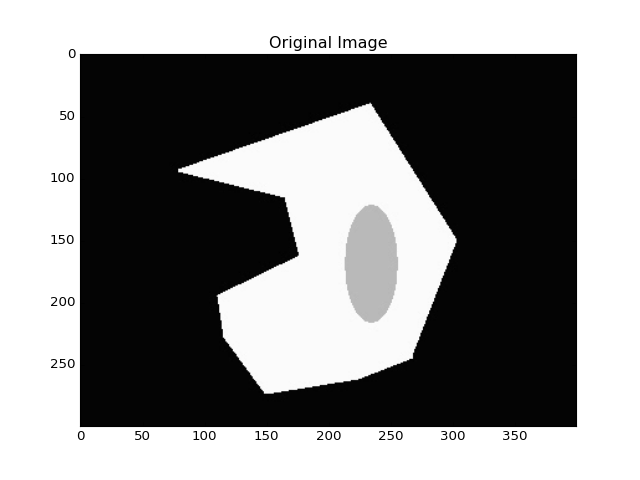

In [3]:
from PIL import Image
model = np.array(Image.open("./data/MODEL.jpg"))
size=model.shape
plt.figure()
plt.title('Original Image')
imshow(model,cmap='gray')

## 1. Threshold Transform

<IPython.core.display.Javascript object>


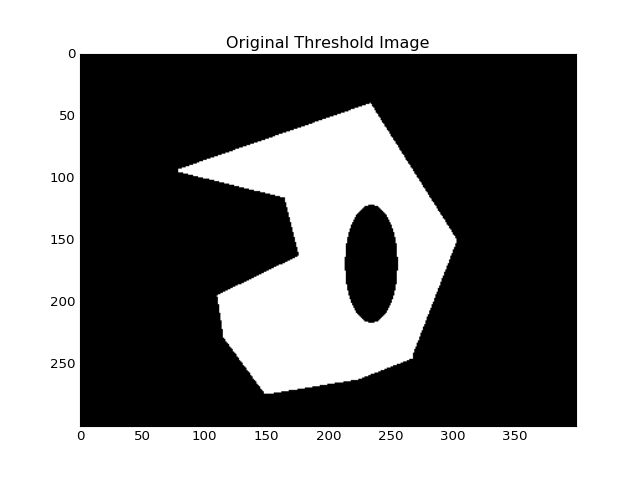

In [4]:
threshimg=np.zeros_like(model)
w=model>200
b=model<200
threshimg[w],threshimg[b]=255,0

plt.figure()
plt.title('Original Threshold Image')
imshow(threshimg,cmap='gray')

## 2. Erosion Transform

The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. 

It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

<IPython.core.display.Javascript object>


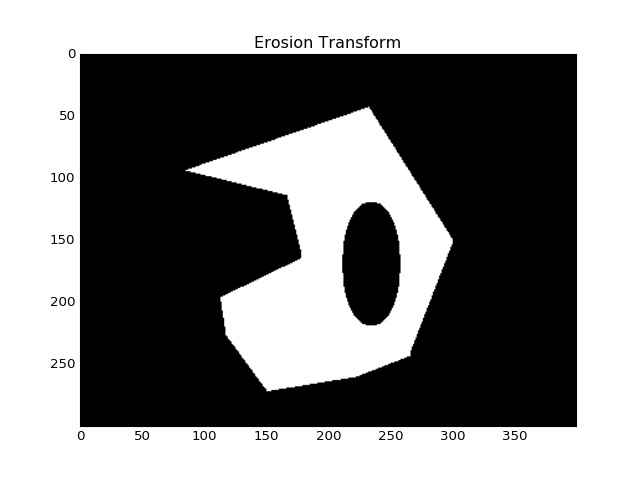

In [5]:
erosion = cv2.erode(threshimg,kernel,iterations = 1)
plt.figure()
plt.title('Erosion Transform')
imshow(erosion,cmap='gray')

<IPython.core.display.Javascript object>


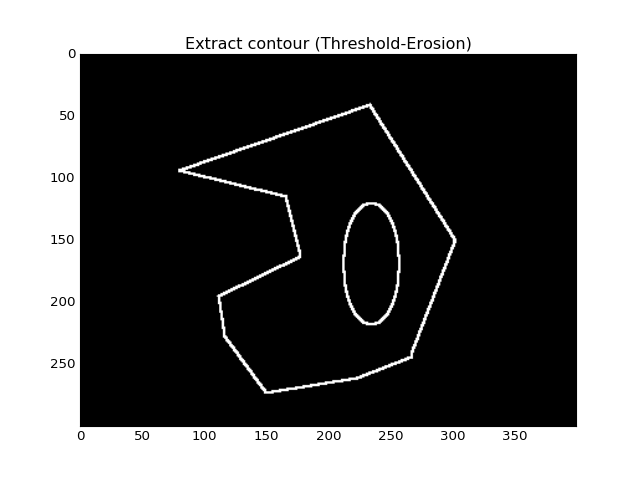

In [6]:
plt.figure()
plt.title('Extract contour (Threshold-Erosion)')
imshow(threshimg- erosion,cmap='gray')

## 3. Dilation

It is just <u>opposite of erosion</u>. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. 

<IPython.core.display.Javascript object>


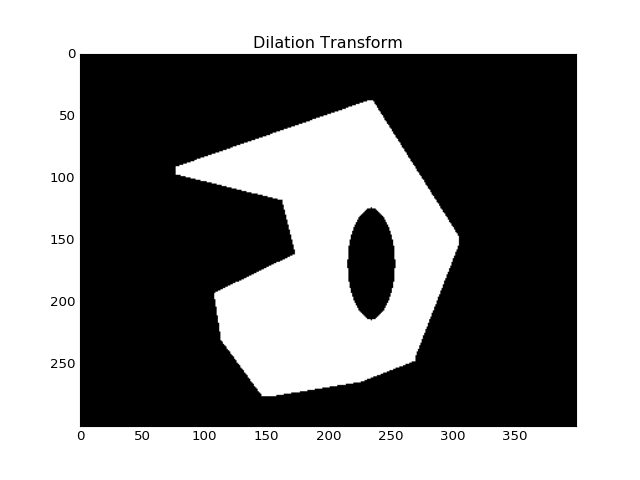

In [7]:
dilation = cv2.dilate(threshimg,kernel,iterations = 1)
plt.figure()
plt.title("Dilation Transform")
imshow(dilation,cmap='gray')

<IPython.core.display.Javascript object>


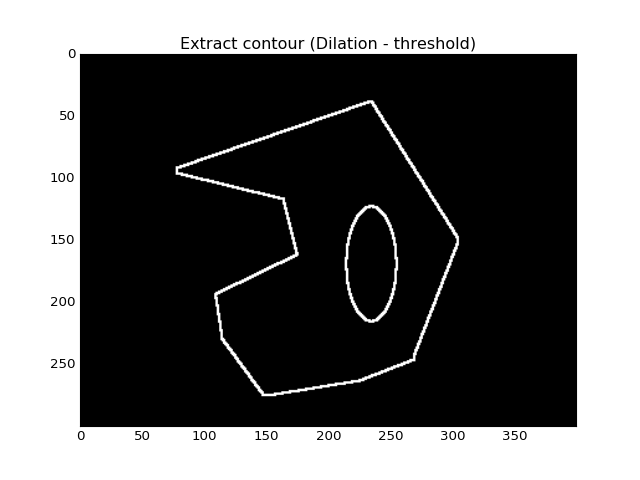

In [8]:
plt.figure()
plt.title('Extract contour (Dilation - threshold)')
imshow(dilation-threshimg,cmap='gray')

<IPython.core.display.Javascript object>


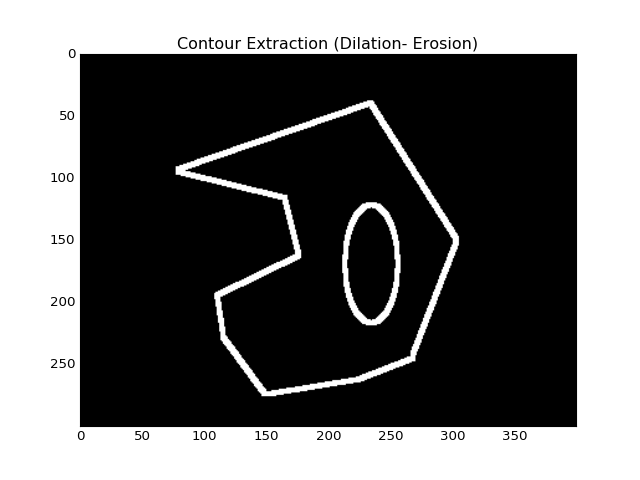

In [9]:
contor=dilation- erosion
plt.figure()
plt.title('Contour Extraction (Dilation- Erosion)')
imshow(contor,cmap='gray')

## 4. Erosion followed by dilation
Normally, in cases like noise removal, <u>erosion is followed by dilation</u>. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

<IPython.core.display.Javascript object>


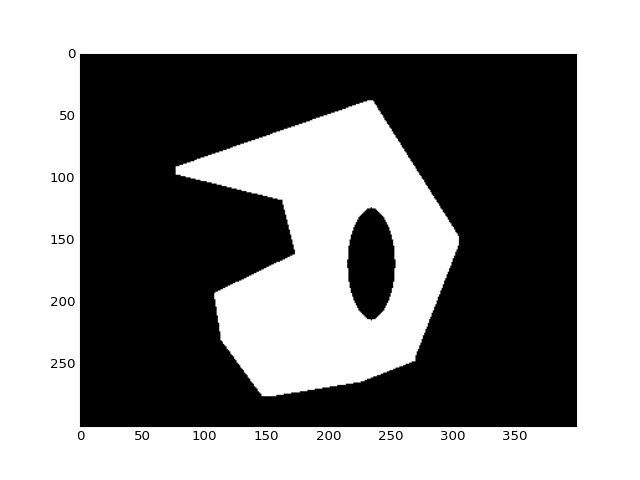

In [10]:
dilation2 = cv2.dilate(erosion,kernel,iterations = 1)
plt.figure()
imshow(dilation,cmap='gray')